In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from dateutil.parser import parse 
import datetime as dt
import matplotlib as mpl
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('btmp_03.csv')
len(df)

470472

In [5]:
df_geo = pd.read_csv('geodata_03.csv')
len(df_geo)

4871

In [6]:
df_geo.rename(columns={'ip':'HostName_1'}, inplace = True)
df = pd.merge(df,df_geo[['HostName_1','country_code','org']], on='HostName_1', how='left')

In [8]:
df['DateTime'] = pd.to_datetime(df.DateTime, format="%Y-%m-%d")
df['HourTime'] = pd.to_datetime(df.HourTime, format="%H:%M:%S")

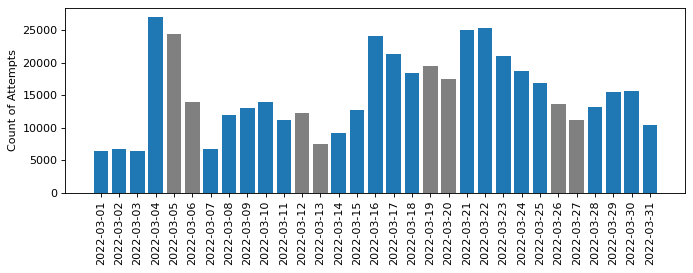

In [9]:
#presentation by day (no signifiacnt correlation, but Sunday attempts are less than Saturday)
plt.rcParams.update({'figure.figsize': (10, 3), 'figure.dpi': 80})
dt_uniq = pd.to_datetime(df['DateTime'].unique())
clrs = ['grey' if dt_uniq[i].weekday()>4 else '#1f77b4' for i in range(len(dt_uniq))]
plt.bar(df['DateTime'].unique(), df['DateTime'].value_counts(sort=False), color=clrs)
plt.xticks(df['DateTime'].unique())
plt.xticks(rotation=90)

plt.title('')
#plt.xlabel('Days')
plt.ylabel('Count of Attempts')
plt.show()

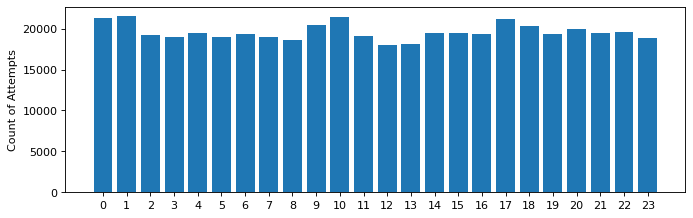

In [10]:
#presentation by hour (There is no significant chaneges due to hours)
plt.rcParams.update({'figure.figsize': (10, 3), 'figure.dpi': 80})
plt.bar(df['HourTime'].dt.hour.unique(), df['HourTime'].dt.hour.value_counts(sort=False))
plt.xticks(df['HourTime'].dt.hour.unique())
plt.xticks(rotation=0)

plt.title('')
#plt.xlabel('Days')
plt.ylabel('Count of Attempts')
plt.show()

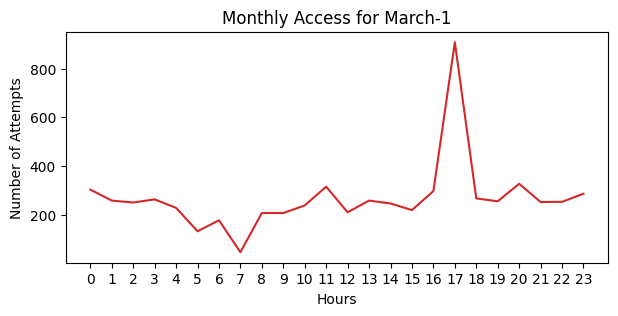

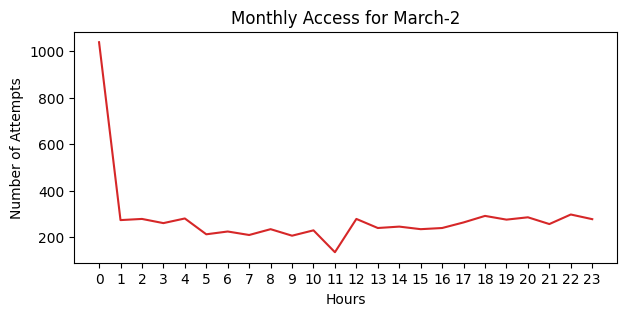

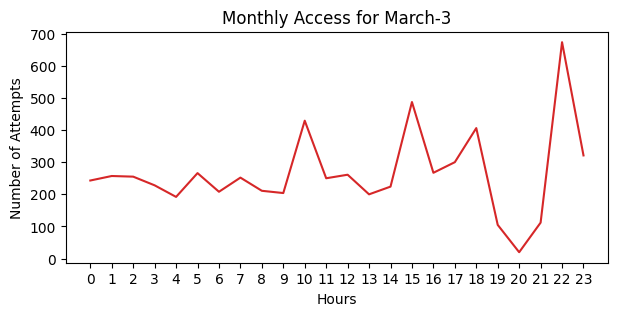

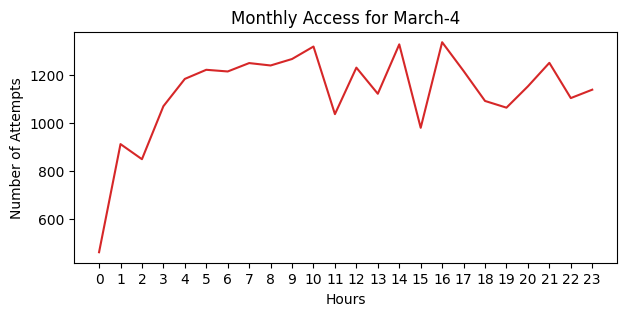

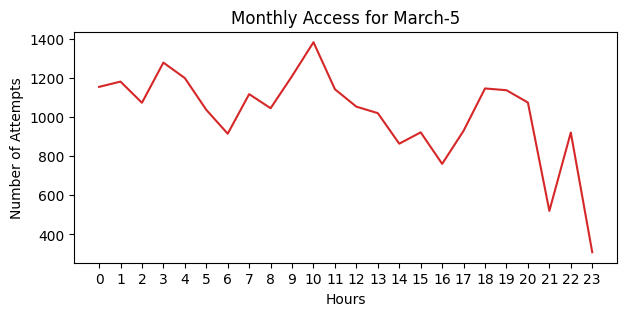

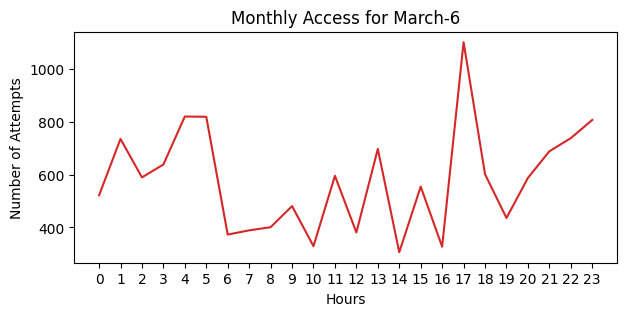

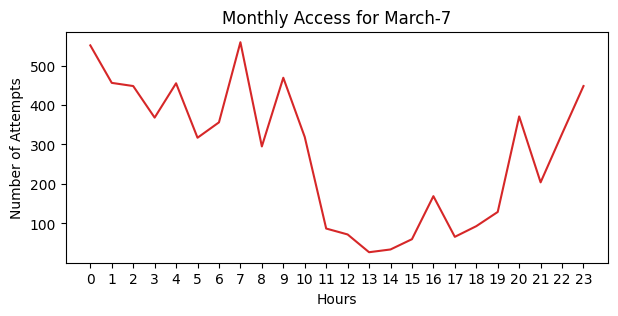

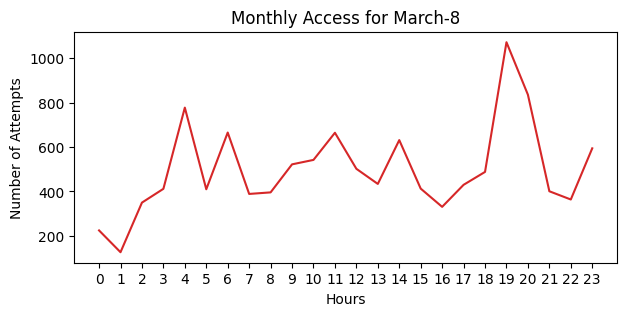

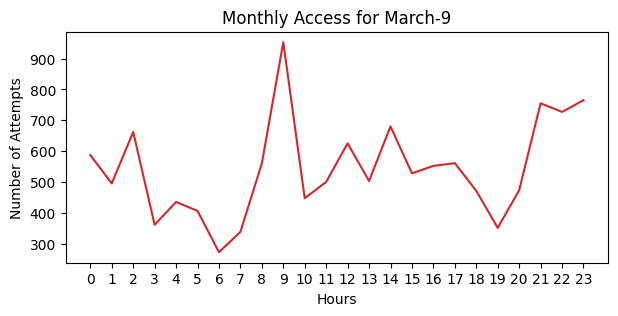

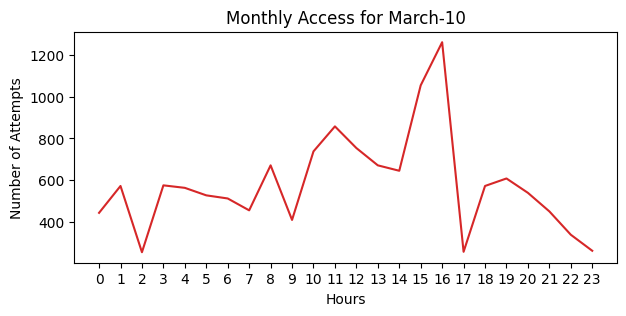

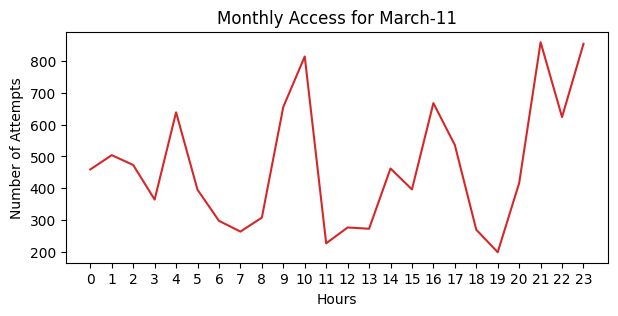

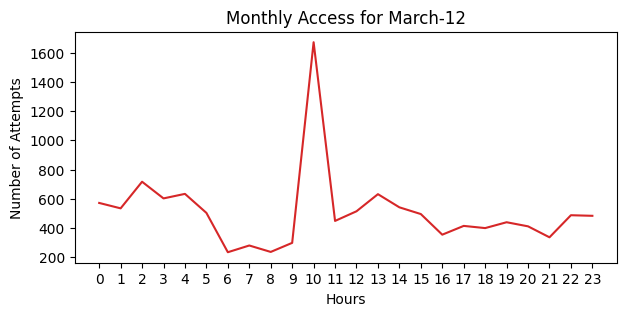

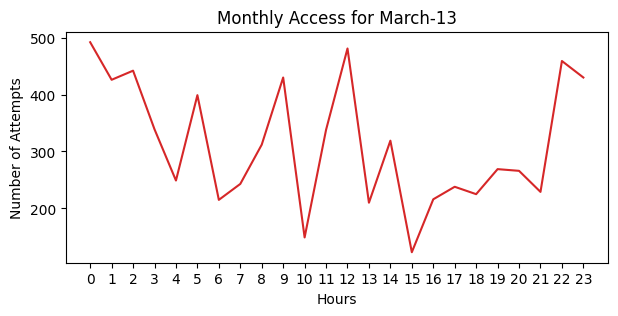

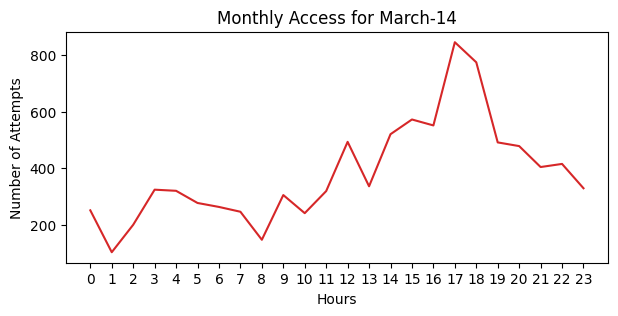

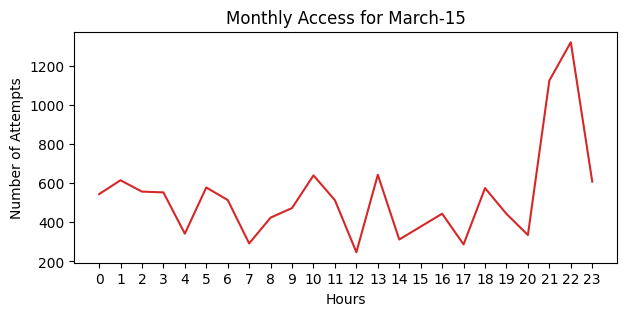

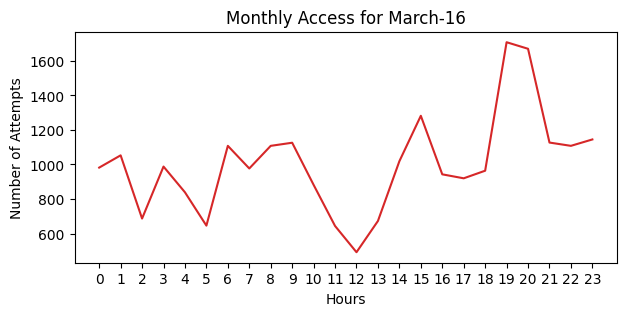

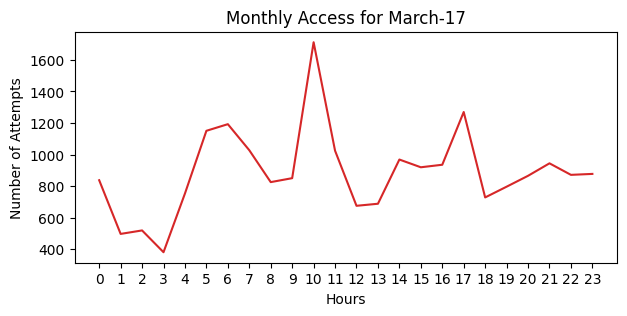

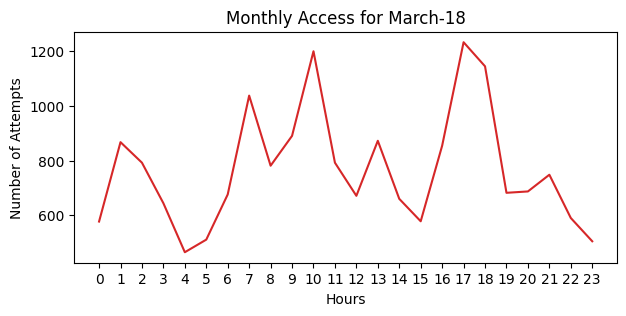

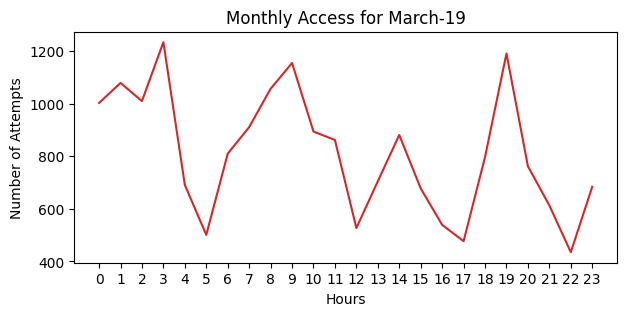

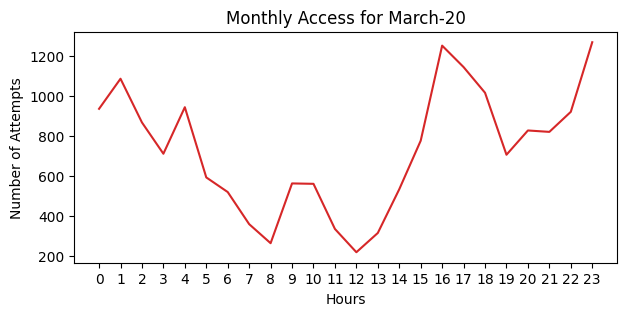

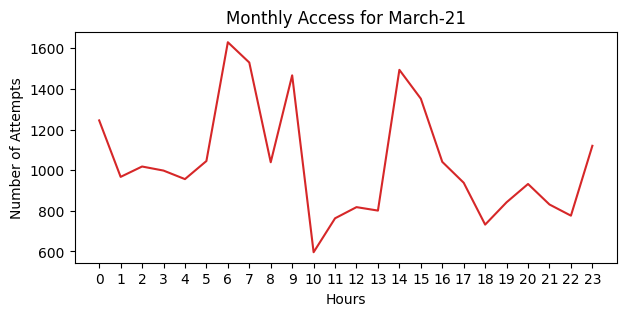

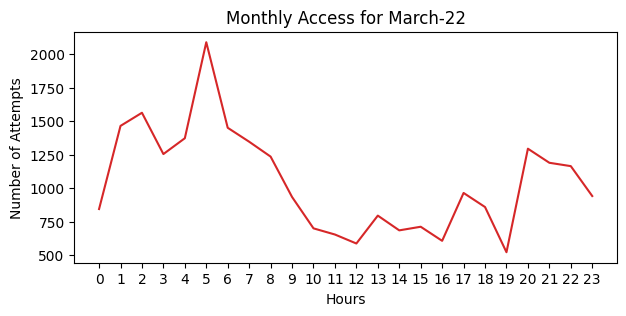

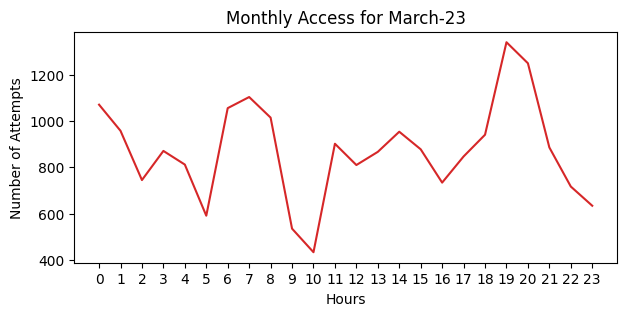

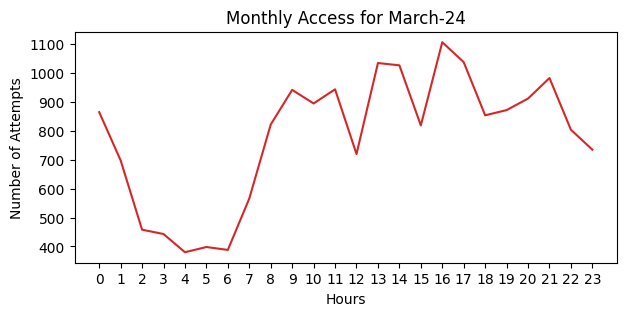

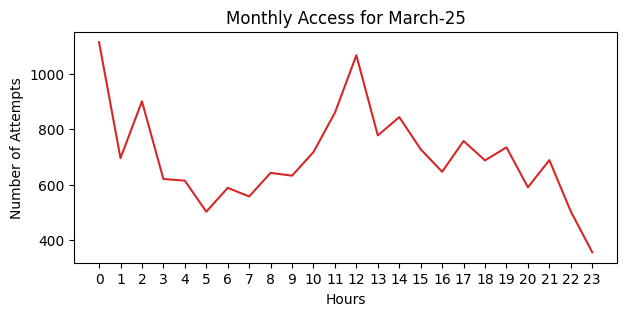

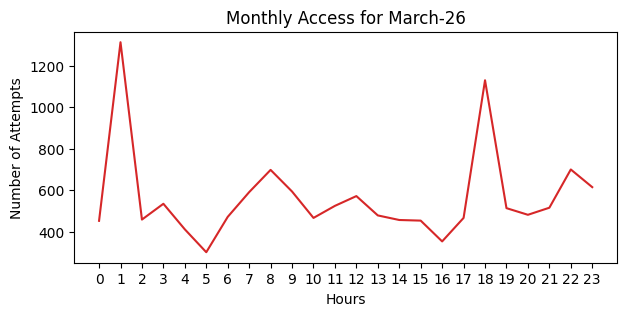

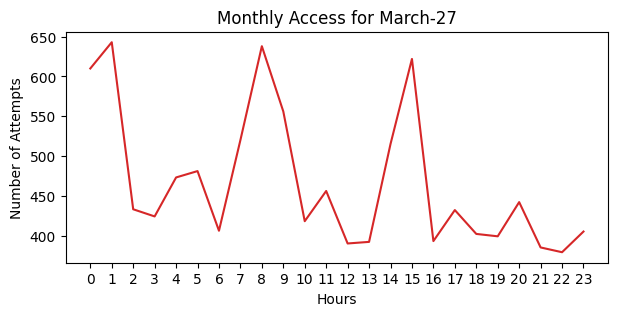

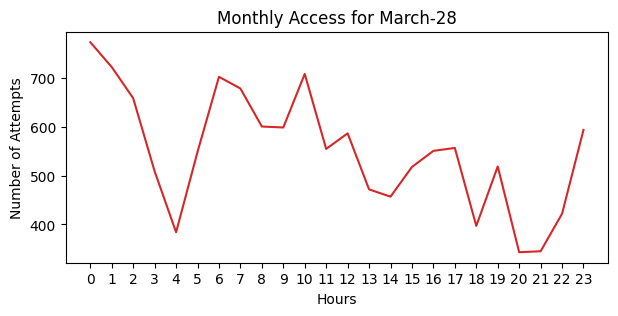

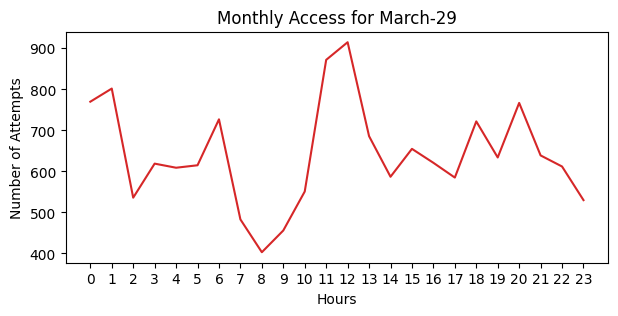

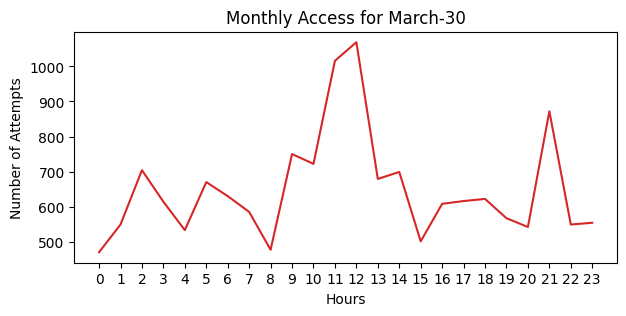

In [11]:
# Daily access hourly (No certain times more effective than the others)
def plot_df(df, x, y, title="", xlabel='Hours', ylabel='Number of Attempts', dpi=100):
    plt.figure(figsize=(7,3), dpi=dpi).tight_layout()
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(df['HourTime'].dt.hour.unique())
    plt.show()
    
for i in range(1,31):
    t='df_'+str(i)
    t = df[df['DateTime'].dt.day==i]
    plot_df(t, x=t['HourTime'].dt.hour.unique(), y=t['HourTime'].dt.hour.value_counts(sort=False), title='Monthly Access for March-'+str(i)) 

In [12]:
country_list= ['CN','US','HK','MX','DE','SG','IN','BR','KR','ID','MY','NL','GB','VN','FR','JP','CO','IT','TW','CA']

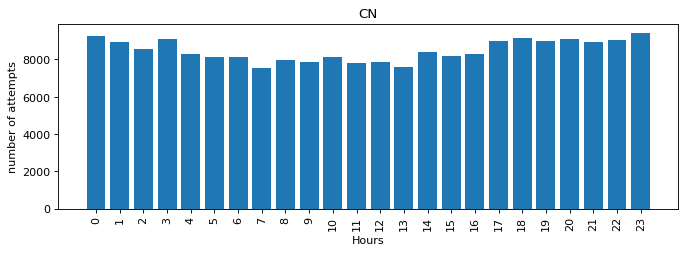

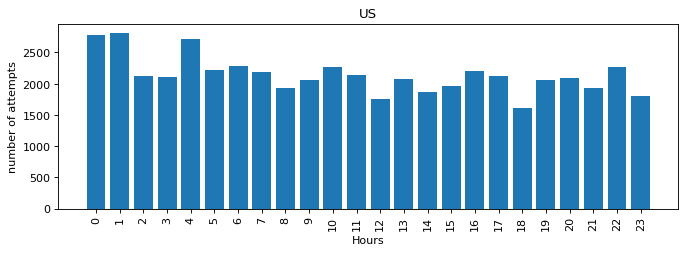

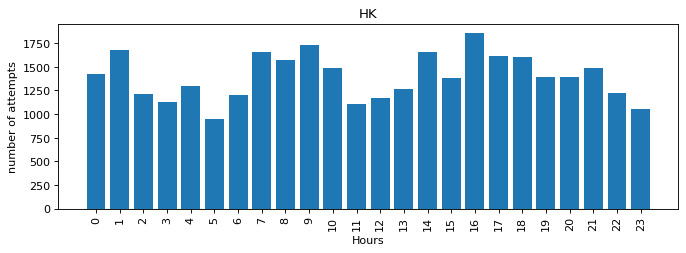

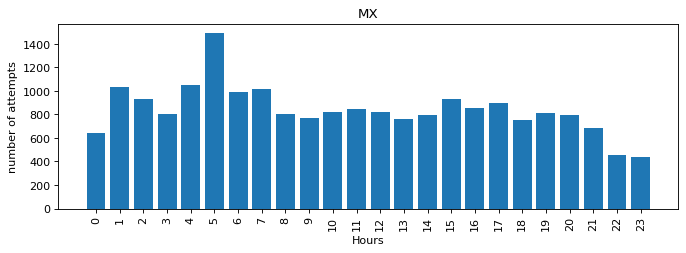

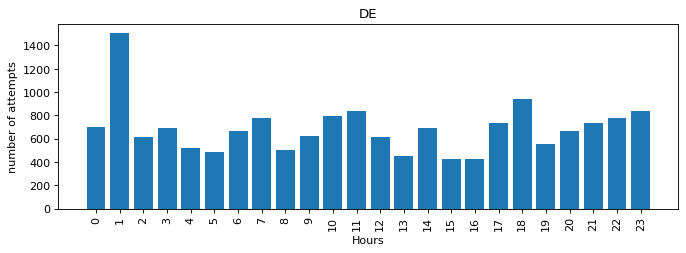

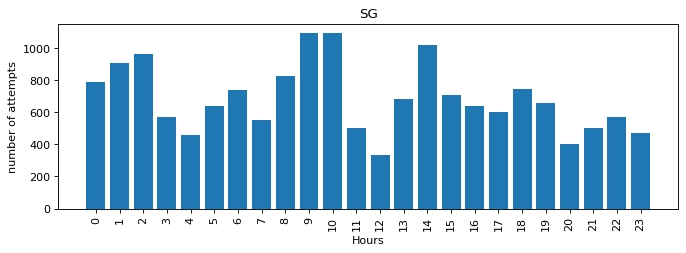

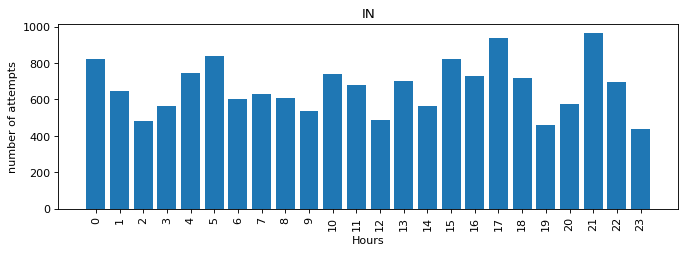

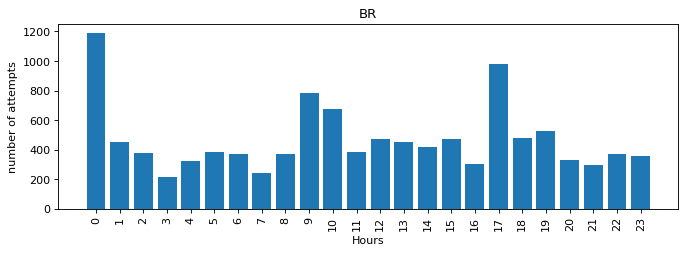

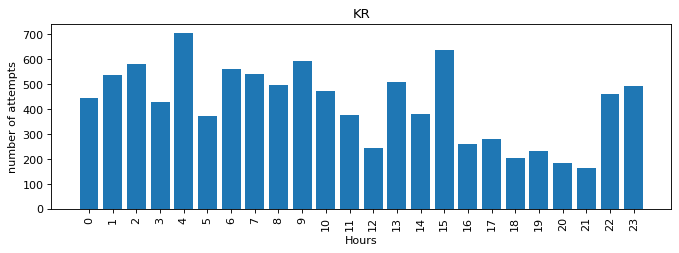

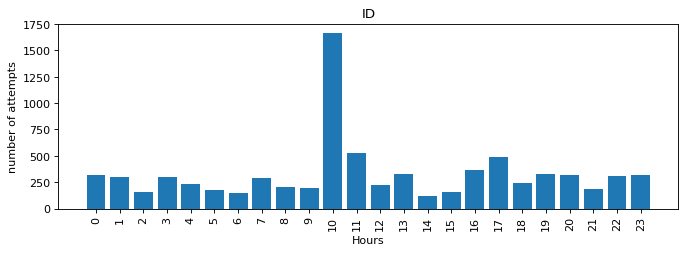

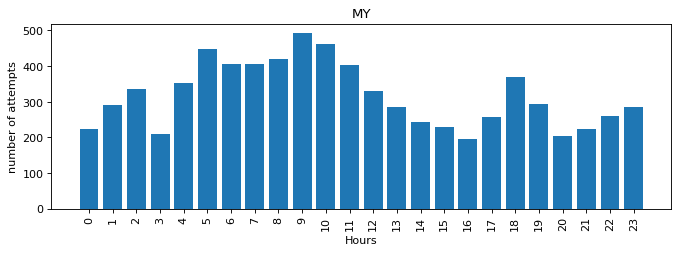

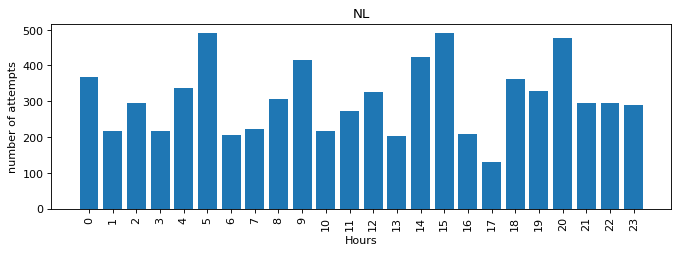

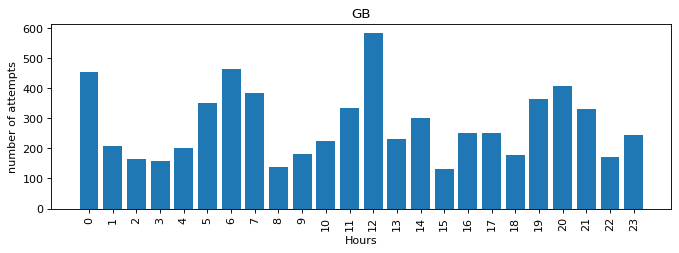

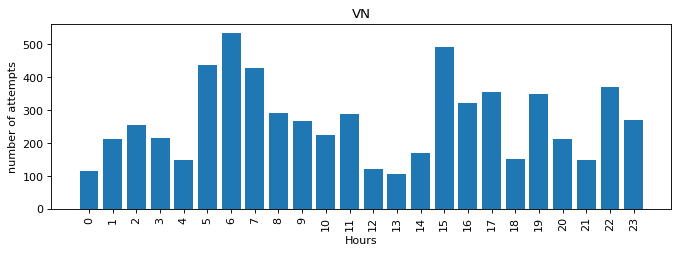

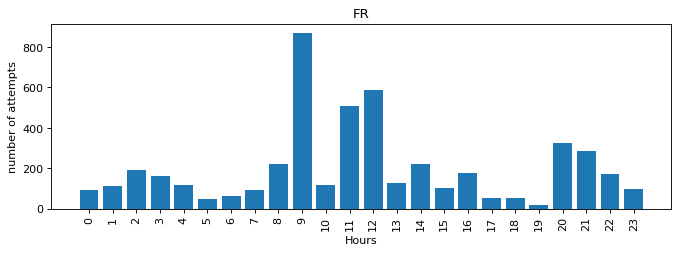

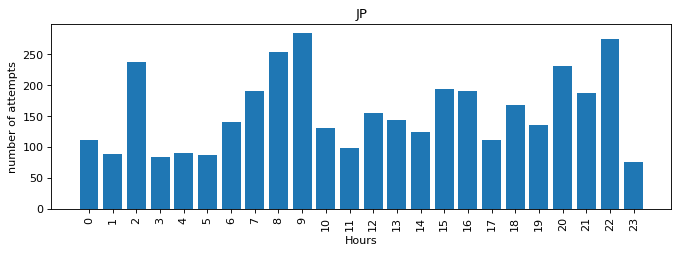

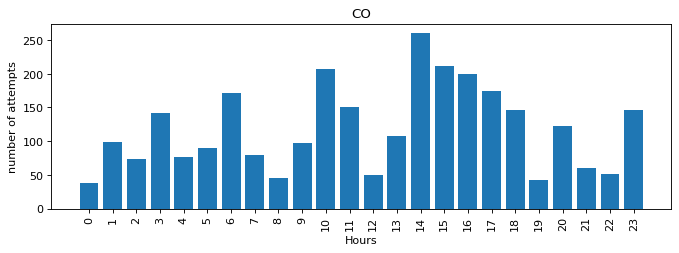

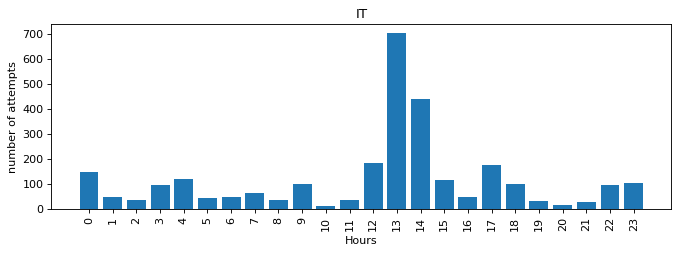

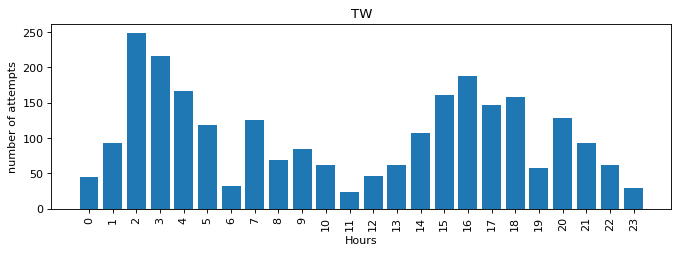

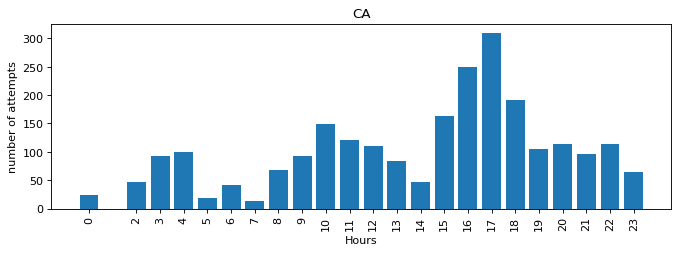

In [13]:
# Attempts according to hours and countries (No significant changes)
for i in range(len(country_list)):
    country = 'df_'+str(country_list[i])
    country_df = df[df['country_code']==country_list[i]]
    
    plt.bar(country_df['HourTime'].dt.hour.unique(), country_df['HourTime'].dt.hour.value_counts(sort=False))
    plt.xticks(country_df['HourTime'].dt.hour.unique())
    plt.xticks(rotation=90)
    plt.gca().set(title=country_list[i], xlabel='Hours', ylabel='number of attempts')
    plt.show()


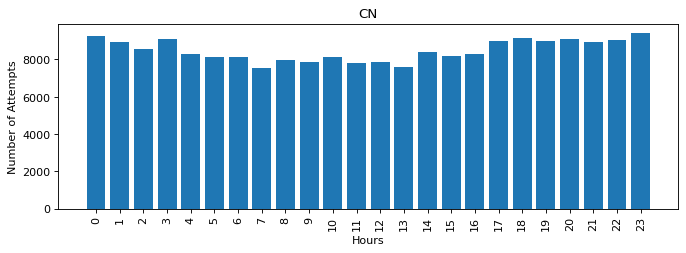

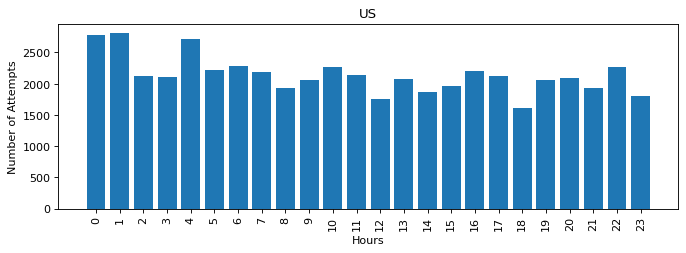

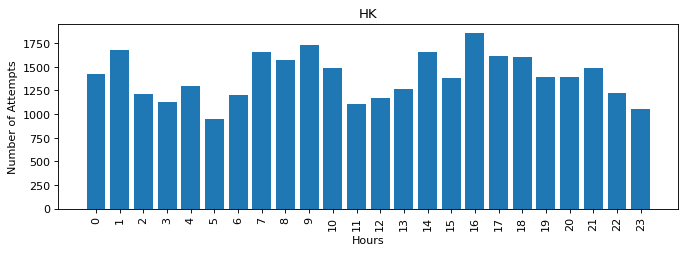

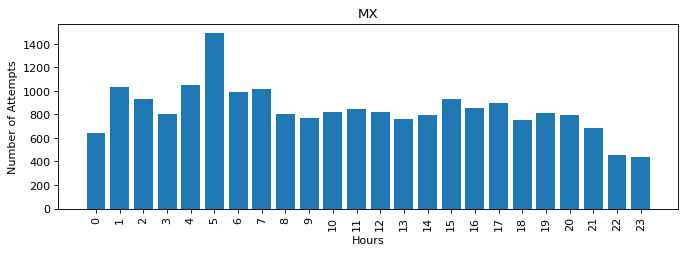

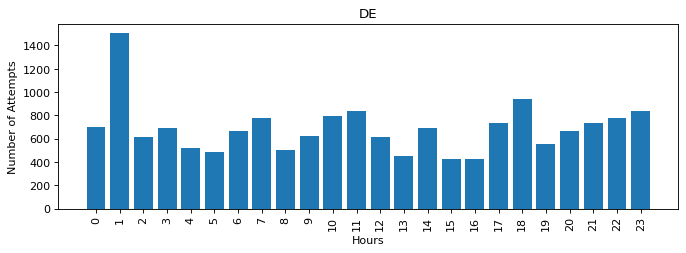

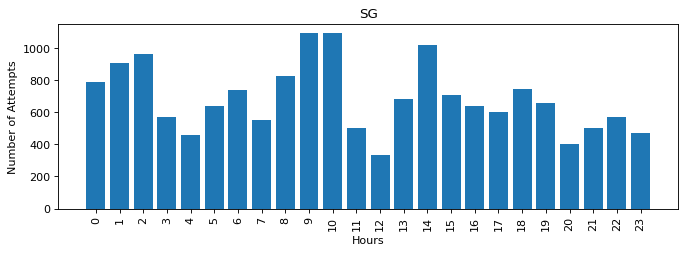

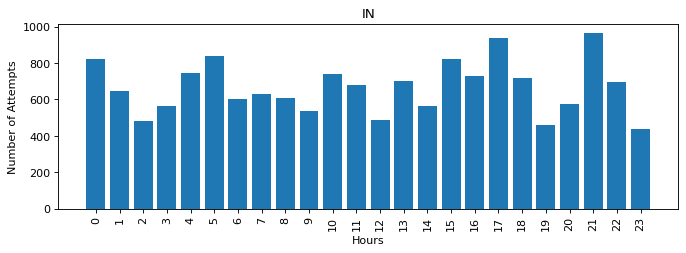

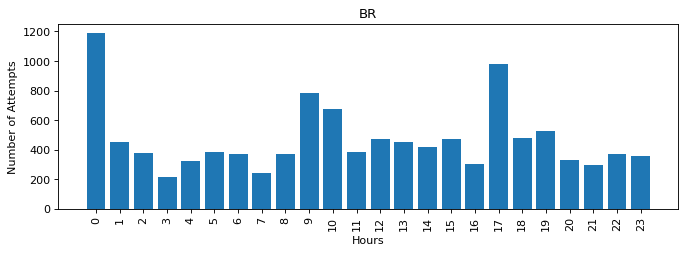

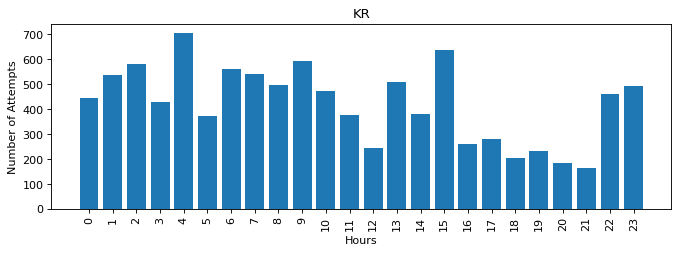

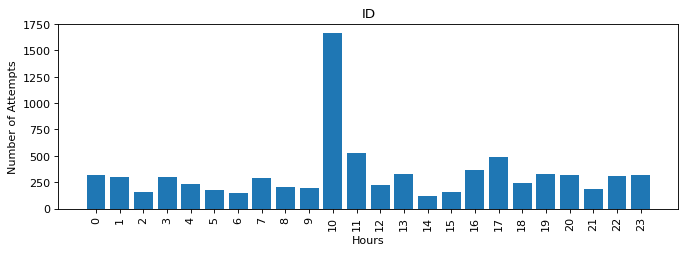

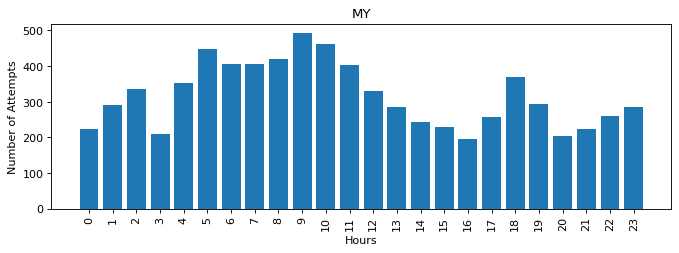

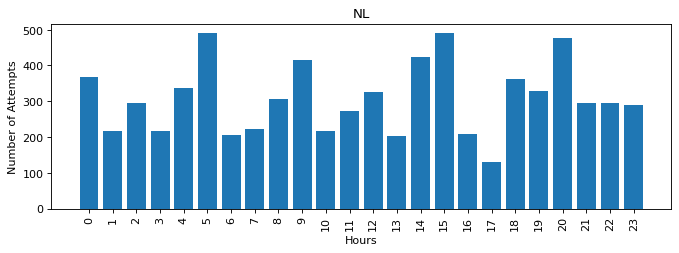

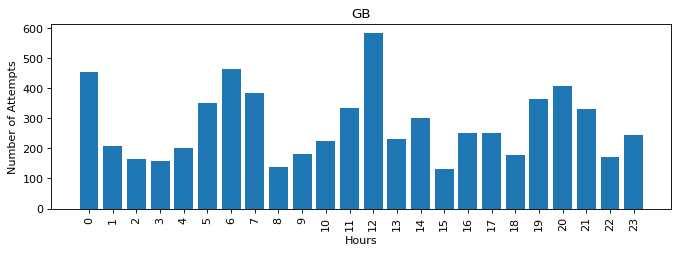

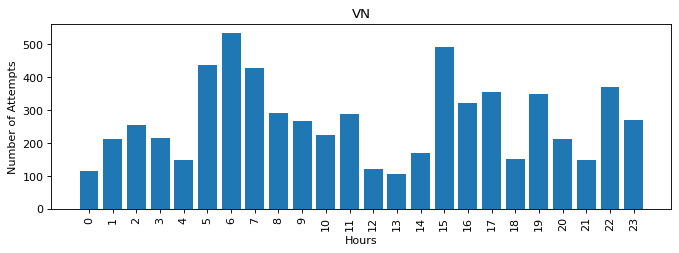

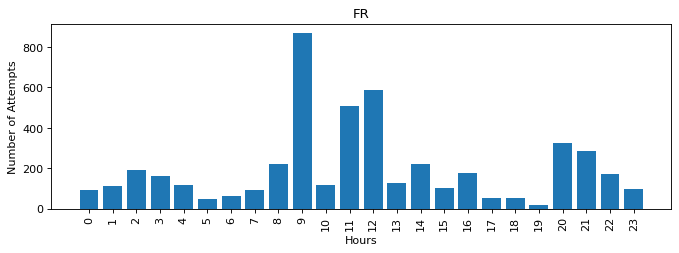

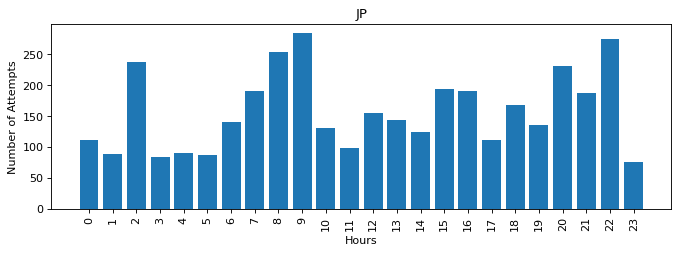

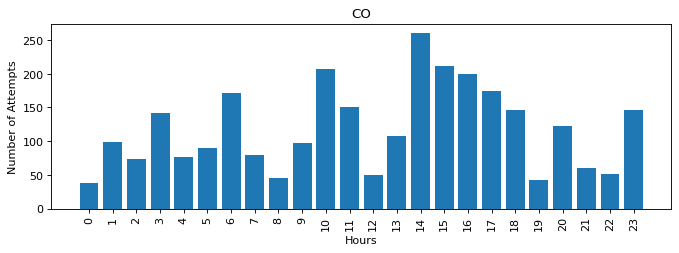

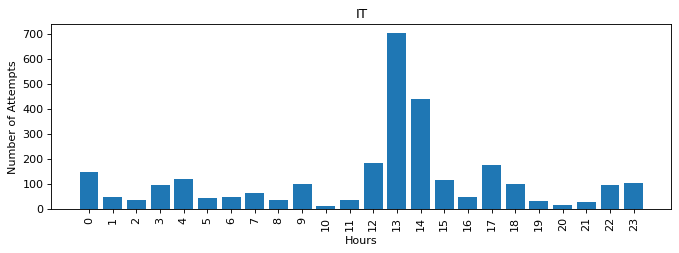

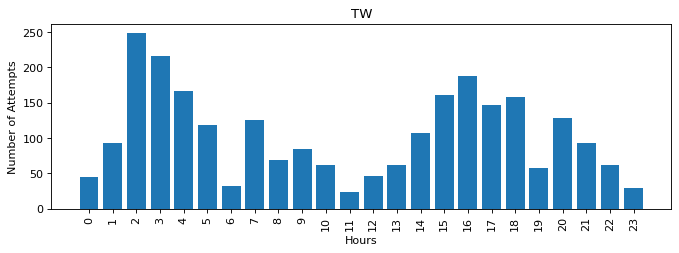

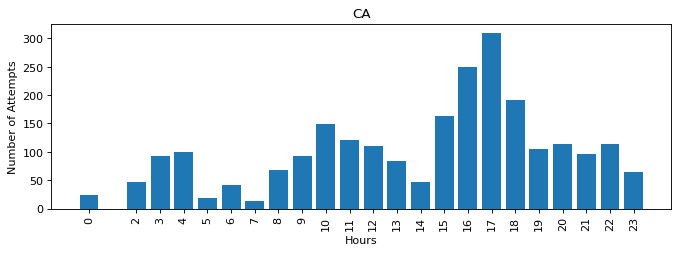

In [14]:
for i in range(len(country_list)):
    country = 'df_'+str(country_list[i])
    country_df = df[df['country_code'] == country_list[i]]
    
    plt.figure(figsize=(10, 3))  # Set your desired height
    
    plt.bar(country_df['HourTime'].dt.hour.unique(), country_df['HourTime'].dt.hour.value_counts(sort=False))
    plt.xticks(country_df['HourTime'].dt.hour.unique())
    plt.xticks(rotation=90)
    plt.gca().set(title=country_list[i], xlabel='Hours', ylabel='Number of Attempts')
    plt.show()